# Simulation of Land Area Distribution Across Countries

According to wikipedia, data like population, income, or land area across countries follow a non-uniform distribution where the Benford's law may hold to some extent.

To understand and explain this phenomenon, let's start with the simplest experiment I can come up with: **divide the land!**

Yes, "divide the land!" is self-explanatory in that we assume the world'map is a result of some random division process. This idea can be formulated into the following math procedure:

- We begin with a large number $V$, and an empty list $C$.
- Repeat the following for $N-1$ times:
    - At each step, draw a uniform random number $u \in [0, V)$
    - Add $u$ we just drew to $C$.
    - Update $V$ with $V \leftarrow V - u$
-  At the last step, add the remaining $V$ to $C$.

After the procedure, list $C$ stores the land area of the $N$ countries, under the constraint that the sum of all area is $V$.

We can simulate this process with many countries, and then study the distribution of elements in $C$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
def divide_the_land(V, N) -> list:
    V_old = V
    C = []
    for i in range(N-1):
        u = np.random.uniform(0, V)
        C.append(u)
        V -= u
    C.append(V)
    assert len(C) == N
    assert np.allclose(np.sum(C), V_old)
    return C


divide_the_land(100, 10)  # Does not seem like a uniform distribution..

[3.227981878881059,
 84.1052904928655,
 0.09260207590339514,
 8.556020277681167,
 2.06042235059767,
 0.8706225708851396,
 1.0232121101506526,
 0.04710912256570317,
 0.0051327699496790296,
 0.011606350520033722]

278 zero-sized countries
Leading digit count: [0.32132964 0.17036011 0.12049861 0.07894737 0.10110803 0.06509695
 0.0401662  0.04293629 0.0567867 ]


/var/folders/rn/zlh0ft7s6rq_33ccg6kbf1qr0000gn/T/ipykernel_43201/2659478496.py:7: RuntimeWarning: divide by zero encountered in divide
  a = X / base**b
/var/folders/rn/zlh0ft7s6rq_33ccg6kbf1qr0000gn/T/ipykernel_43201/2659478496.py:8: RuntimeWarning: invalid value encountered in cast
  return np.floor(a).astype(int)


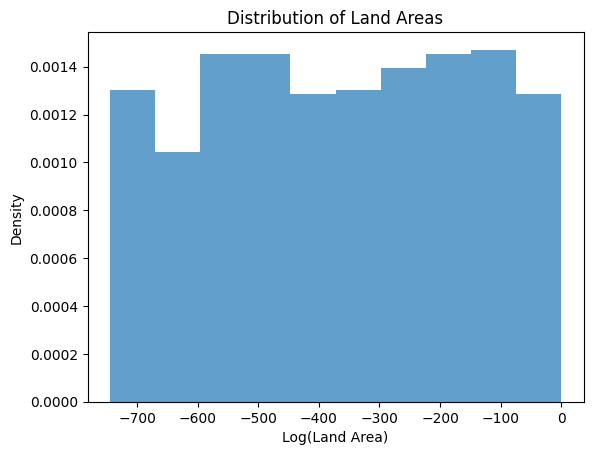

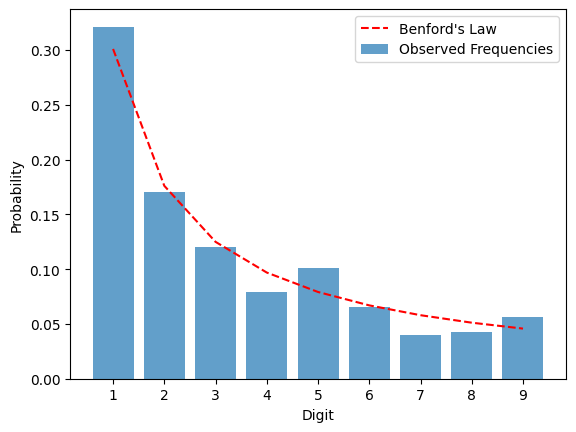

In [84]:
# Implement the leading digit counting procedure
def leading_digits(X, base=10):
    if (X <= 0).any():
        raise ValueError("All elements must be positive")
    # Decompose into x = a * 10**b
    b = np.floor(np.log(X) / np.log(base))
    a = X / base**b
    return np.floor(a).astype(int)


def count_leading_digits(X, base=10, probability=False):
    Y = leading_digits(X, base)
    Y = Y[Y > 0]  # Remove leading zeros
    count = np.bincount(Y, minlength=base-1)
    assert count[0] == 0
    count = count[1:]
    if probability:
        return count / len(X)
    else:
        return count


# Test Benford's Law on a log-uniformly distributed data [eps, b]
base = 10
X = np.array(divide_the_land(1, int(1e3)))
print(np.sum(X <= 0), "zero-sized countries")
X = X[X > 0]
# Plot the land area distribution
plt.figure()
plt.hist(np.log(X), bins=10, density=True, alpha=0.7, label='Land Area Distribution')
plt.xlabel("Log(Land Area)")
plt.ylabel("Density")
plt.title("Distribution of Land Areas")

count = count_leading_digits(X, base, probability=True)
print("Leading digit count:", count)

plt.figure()
# Plot the observed frequencies
plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
# Plot the theoretical probabilities
benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
plt.legend()
plt.xticks(range(1, base))
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.show()
plt.close('all')